In [24]:
# import libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from IPython.display import Image
from statistics import mode
from scipy.stats import skew, kurtosis

# set the current working directory
os.chdir(sys.path[0])

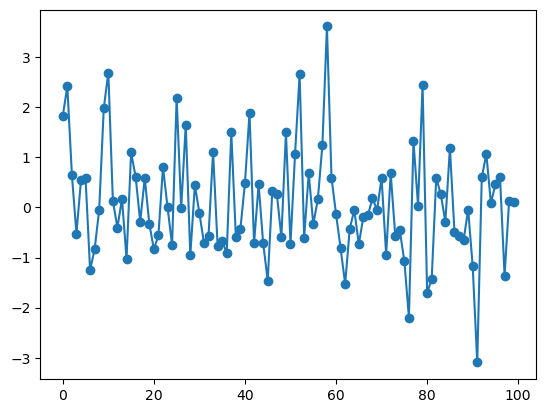

In [25]:
plt.plot(np.arange(100), np.random.normal(0,1,100), '-o')


In [26]:
def markov_chain(initial_state, n, P):
    # Define state names and map them to indices
    states = ['Hot', 'Cold']
    state_index = {state: idx for idx, state in enumerate(states)}
    
    # Map the initial state to its index
    current_state_idx = state_index[initial_state]
    
    # Initialize the sequence with the initial state
    sequence = [states[current_state_idx]]
    
    for _ in range(n - 1):
        # Get the transition probabilities for the current state
        transition_probs = P[current_state_idx]
        
        # Choose the next state based on the transition probabilities
        next_state_idx = np.random.choice([0, 1], p=transition_probs)
        
        # Append the next state to the sequence
        sequence.append(states[next_state_idx])
        
        # Update the current state index
        current_state_idx = next_state_idx

    return sequence

In [27]:
sim_1 = markov_chain('Hot', 20, np.array([
    [0.25, 0.75],
    [0.7, 0.3]]))

sim_2 = markov_chain('Hot', 20, np.array([
    [0.25, 0.75],
    [0.7, 0.3]]))

df = pd.DataFrame({'sim_1': sim_1,
        'sim_2': sim_2})

In [28]:
df

,sim_1,sim_2
0,Hot,Hot
1,Cold,Cold
2,Hot,Hot
3,Cold,Cold
4,Hot,Hot
5,Cold,Cold
6,Hot,Hot
7,Cold,Hot
8,Hot,Cold
9,Cold,Hot


In [29]:
# Define the Lorenz system of differential equations
def lorenz(state, t, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return dxdt, dydt, dzdt# Parameters for the Lorenz system
sigma = 10
rho = 28
beta = 8/3

# Initial state
state0 = [0, 1, 1]

# Time vector
t = np.linspace(0, 20, 20000)

# Solve ODE
states = odeint(lorenz, state0, t, args=(sigma, rho, beta))

In [30]:
# Parameters for the Lorenz system
sigma = 10
rho = 28
beta = 8/3

# Initial state
state0 = [0, 1, 1]

# Time vector
t = np.linspace(0, 20, 20000)

# Solve ODE
states = odeint(lorenz, state0, t, args=(sigma, rho, beta))

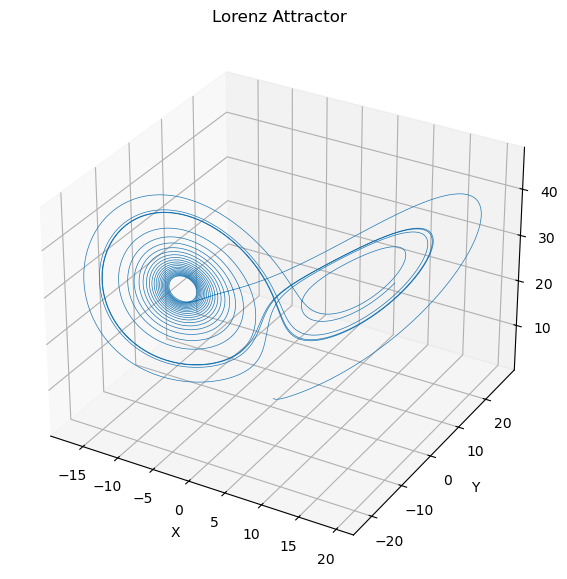

In [31]:
# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(states[:, 0], states[:, 1], states[:, 2], lw=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')

plt.show()

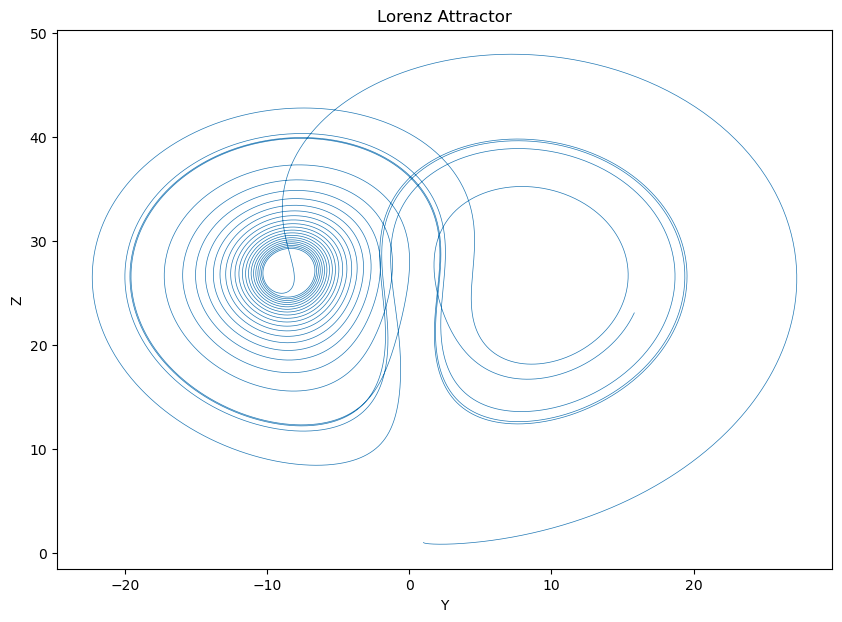

In [32]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(states[:, 1], states[:, 2], lw=0.5)

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_title('Lorenz Attractor')

plt.show()